In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import os
import seaborn as sns
from sklearn import metrics

In [2]:
current_working_directory = os.getcwd()
lab_directory = os.path.dirname(current_working_directory)
paper_dir = os.path.join(lab_directory, "paper")
folder_figures = os.path.join(paper_dir, "plots")
folder_tables = os.path.join(paper_dir, "tabelas")


data_folder = os.path.join(lab_directory, "data")


path_file = os.path.join(data_folder, "processed", "Banda_secundaria_2008-2023.csv")

data = pd.read_csv(path_file)
data["datetime"] = pd.to_datetime(data["datetime"])
data = data.set_index("datetime")

In [3]:
data["year"] = data.index.year
data["month"] = data["Data"].index.month
data["day"] = data["Data"].index.day
data["day_of_year"] = data["Data"].index.day_of_year

In [4]:
#data = data[data.index.year>=2010]
#data = data[data.index.year<=2019]

In [5]:
# Bastantes outliers acima de cerca de 15k MWh
Q3 = data["Consumo [MWh]"].quantile(0.75)
Q1 = data["Consumo [MWh]"].quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + (1.5 * IQR)

data = data[data["Consumo [MWh]"] < upper_limit]

In [6]:
data["Hora"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23,  0])

In [7]:
parametro_p_delia = {
    1.6: [1, 2, 8, 9, 0],
    1.4: [3, 7, 10, 11, 19, 20],
    1.3: [4],
    1.2: [5, 6, 12, 13, 14, 15, 16, 17, 18, 22, 23, 21],
}

map_p_delia = {}
for key in parametro_p_delia:
    for hora in parametro_p_delia[key]:
        map_p_delia[hora] = key

In [8]:
nome_tese_celia = "Carneiro2016"
tese_celia_rho = """p """+f"{nome_tese_celia}"

In [9]:
data[tese_celia_rho] = data["Hora"].map(map_p_delia)

In [10]:
data=data.rename(
    {"Necessidade Banda Subir [MW]":"Banda a Subir REN",
     "Necessidade Banda Descer [MW]":"Banda a Descer REN",
    },axis=1
    
)

In [11]:
data

,Data,Hora,Banda a Subir REN,Banda a Descer REN,Banda Contratada Subir [MW],Banda Contratada Descer [MW],Reserva Secundária - Ativada PT - Subir [MWh],Reserva Secundária - Ativada PT - Descer [MWh],Consumo [MWh],Necessidade Banda Reserva,Banda Reserva Contractada,Banda Reserva Ativada,erro,year,month,day,day_of_year,p Carneiro2016
datetime,,,,,,,,,,,,,,,,,,
2008-07-01 01:00:00+00:00,2008-07-01,1,131.0,65.0,130.0,65.0,79.90,20.90,5953.826,196.0,195.0,100.80,95.20,2008,7,1,183,1.6
2008-07-01 02:00:00+00:00,2008-07-01,2,126.0,63.0,120.0,60.0,17.40,33.30,5419.243,189.0,180.0,50.70,138.30,2008,7,1,183,1.6
2008-07-01 03:00:00+00:00,2008-07-01,3,120.0,60.0,96.0,48.0,26.60,0.00,5051.821,180.0,144.0,26.60,153.40,2008,7,1,183,1.4
2008-07-01 04:00:00+00:00,2008-07-01,4,116.0,58.0,96.0,48.0,74.10,0.00,4838.914,174.0,144.0,74.10,99.90,2008,7,1,183,1.3
2008-07-01 05:00:00+00:00,2008-07-01,5,113.0,57.0,96.0,48.0,61.80,4.20,4712.141,170.0,144.0,66.00,104.00,2008,7,1,183,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 20:00:00+00:00,2023-12-31,20,194.3,97.1,200.0,100.0,161.72,0.00,7430.456,291.4,300.0,161.72,129.68,2023,12,31,365,1.4
2023-12-31 21:00:00+00:00,2023-12-31,21,193.3,96.6,200.0,100.0,0.00,16.09,7355.778,289.9,300.0,16.09,273.81,2023,12,31,365,1.2
2023-12-31 22:00:00+00:00,2023-12-31,22,184.8,92.4,192.0,96.0,0.00,51.80,6661.684,277.2,288.0,51.80,225.40,2023,12,31,365,1.2


In [12]:
A=10
B=150

# BRS = p x sqrt(a x Lmax + b²) - b
def calculo_banda_subir(df, col_rho="", col_L=""):
    return (df[col_rho] * np.sqrt((A * df[col_L])+ (B*B)))-B

# p = (Banda_Subir + b) / sqrt(a * Lmax + b²)
def calculo_rho(df, col_banda_subir="", col_L=""):
    return (df[col_banda_subir]+B)/np.sqrt((A * df[col_L])+ (B*B))

In [13]:
col_L = "Consumo [MWh]"
col_rho_cru = "p cru"
col_banda_subir="Banda a Subir REN"

data[col_rho_cru] = calculo_rho(data, col_banda_subir, col_L)

In [14]:
tese_celia_BR = f"Banda Reserva {nome_tese_celia}"

tese_celia_BRS = f"Banda a Subir {nome_tese_celia}"

data[tese_celia_BR] = calculo_banda_subir(data, col_rho=tese_celia_rho, col_L=col_L)
data[tese_celia_BRS] = data[tese_celia_BR]*(2/3)


In [15]:
data

,Data,Hora,Banda a Subir REN,Banda a Descer REN,Banda Contratada Subir [MW],Banda Contratada Descer [MW],Reserva Secundária - Ativada PT - Subir [MWh],Reserva Secundária - Ativada PT - Descer [MWh],Consumo [MWh],Necessidade Banda Reserva,...,Banda Reserva Ativada,erro,year,month,day,day_of_year,p Carneiro2016,p cru,Banda Reserva Carneiro2016,Banda a Subir Carneiro2016
datetime,,,,,,,,,,,,,,,,,,,,,
2008-07-01 01:00:00+00:00,2008-07-01,1,131.0,65.0,130.0,65.0,79.90,20.90,5953.826,196.0,...,100.80,95.20,2008,7,1,183,1.6,0.981066,308.277149,205.518100
2008-07-01 02:00:00+00:00,2008-07-01,2,126.0,63.0,120.0,60.0,17.40,33.30,5419.243,189.0,...,50.70,138.30,2008,7,1,183,1.6,0.996627,293.094370,195.396247
2008-07-01 03:00:00+00:00,2008-07-01,3,120.0,60.0,96.0,48.0,26.60,0.00,5051.821,180.0,...,26.60,153.40,2008,7,1,183,1.4,0.999190,228.306346,152.204231
2008-07-01 04:00:00+00:00,2008-07-01,4,116.0,58.0,96.0,48.0,74.10,0.00,4838.914,174.0,...,74.10,99.90,2008,7,1,183,1.3,0.999060,196.125189,130.750126
2008-07-01 05:00:00+00:00,2008-07-01,5,113.0,57.0,96.0,48.0,61.80,4.20,4712.141,170.0,...,66.00,104.00,2008,7,1,183,1.2,0.996746,166.630432,111.086955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 20:00:00+00:00,2023-12-31,20,194.3,97.1,200.0,100.0,161.72,0.00,7430.456,291.4,...,161.72,129.68,2023,12,31,365,1.4,1.106596,285.588037,190.392024
2023-12-31 21:00:00+00:00,2023-12-31,21,193.3,96.6,200.0,100.0,0.00,16.09,7355.778,289.9,...,16.09,273.81,2023,12,31,365,1.2,1.107663,221.918275,147.945517
2023-12-31 22:00:00+00:00,2023-12-31,22,184.8,92.4,192.0,96.0,0.00,51.80,6661.684,277.2,...,51.80,225.40,2023,12,31,365,1.2,1.121516,208.229325,138.819550


In [16]:
p_delia_bins = len(np.unique(data[tese_celia_rho]))
p_calculado_bins = len(np.unique(data[col_rho_cru].round(2)))

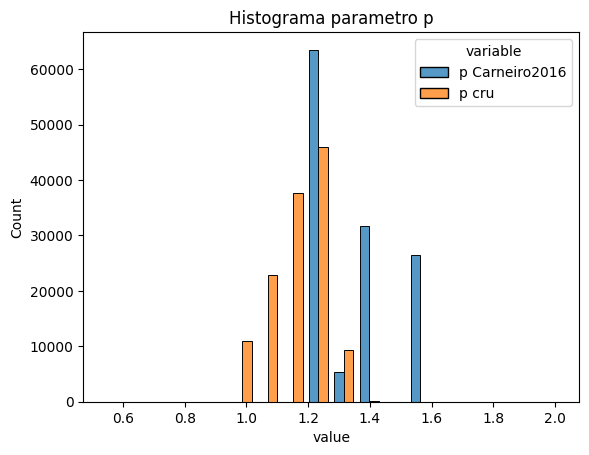

In [17]:
plot_name = "Histograma parametro p"

sns_plot = sns.histplot(
    data[[tese_celia_rho, col_rho_cru]].melt(),
    x="value",
    hue="variable",
    multiple="dodge",
    shrink=0.75,
    bins=int(p_calculado_bins/4),
)
sns_plot.set(title=plot_name)

figure_name_path = os.path.join(
    folder_figures, f"{"_".join(plot_name.lower().split(" "))}.png"
)
sns_plot.figure.savefig(figure_name_path)

In [18]:
figure_name_path

'/home/joao/Documentos/renewable-penetration/paper/plots/histograma_parametro_p.png'

/tmp/ipykernel_7395/945819439.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


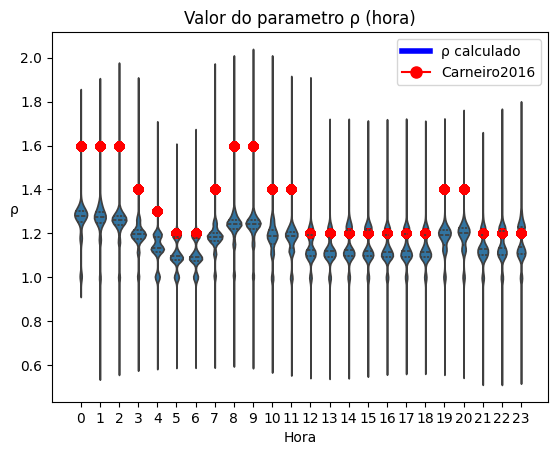

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create a figure and axis object
fig, ax = plt.subplots()

# Create the violin plot
sns.violinplot(
    x="Hora",
    y=col_rho_cru,
    data=data,
    inner="quartile",  # palette="Set3",
    ax=ax,
)

# Overlay the scatter plot
ax.scatter(data["Hora"], data[tese_celia_rho], color="red")

# Customize the appearance of the plot
plot_name = "Valor do parametro ρ (hora)"
plt.title(plot_name)
plt.xlabel("Hora")
plt.ylabel("ρ", rotation=0)
plt.legend()
legend_elements = [
    plt.Line2D([0], [0], color="blue", lw=4, label="ρ calculado"),
    plt.Line2D(
        [0], [0], marker="o", color="red", label="Carneiro2016", markersize=8
    ),
]
ax.legend(handles=legend_elements)
# Show the plot
plt.show()
figure_name_path = os.path.join(
    folder_figures, f"{"_".join(plot_name.lower().split(" "))}.png"
)
fig.savefig(figure_name_path)

In [20]:
figure_name_path

'/home/joao/Documentos/renewable-penetration/paper/plots/valor_do_parametro_ρ_(hora).png'

In [21]:
def weighted_group_average(
    df, group_col="Hora", value_col=col_rho_cru, weights_col="BANDA_SUBIR"
):

    return round(
        df.groupby(group_col).apply(
            lambda x: (x[value_col] * x[weights_col]).sum()
            / x[weights_col].sum()
        ),
        1,
    )

In [22]:
median_data = (
    data[["Hora", tese_celia_rho, col_rho_cru]].groupby("Hora").median()
)
mean_data = data[["Hora", tese_celia_rho,col_rho_cru]].groupby("Hora").mean()

In [23]:
data["p_proposto_media"] = data["Hora"].map(mean_data.to_dict()[col_rho_cru])
data["p_proposto_mediana"] = data["Hora"].map(
    median_data.to_dict()[col_rho_cru]
)

In [24]:

weighted_consumo_mean = weighted_group_average(
    data, value_col=col_rho_cru, weights_col="Consumo [MWh]"
)
weighted_band_subir_mean = weighted_group_average(
    data, value_col=col_rho_cru, weights_col="Banda a Subir REN"
)



data["p_proposto_media_ponderada_consumo"] = data["Hora"].map(
    weighted_consumo_mean.to_dict()
)
data["p_proposto_media_ponderada_banda_subir"] = data["Hora"].map(
    weighted_band_subir_mean.to_dict()
)


/tmp/ipykernel_7395/3048625822.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby(group_col).apply(
/tmp/ipykernel_7395/3048625822.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby(group_col).apply(


In [25]:
data

,Data,Hora,Banda a Subir REN,Banda a Descer REN,Banda Contratada Subir [MW],Banda Contratada Descer [MW],Reserva Secundária - Ativada PT - Subir [MWh],Reserva Secundária - Ativada PT - Descer [MWh],Consumo [MWh],Necessidade Banda Reserva,...,day,day_of_year,p Carneiro2016,p cru,Banda Reserva Carneiro2016,Banda a Subir Carneiro2016,p_proposto_media,p_proposto_mediana,p_proposto_media_ponderada_consumo,p_proposto_media_ponderada_banda_subir
datetime,,,,,,,,,,,,,,,,,,,,,
2008-07-01 01:00:00+00:00,2008-07-01,1,131.0,65.0,130.0,65.0,79.90,20.90,5953.826,196.0,...,1,183,1.6,0.981066,308.277149,205.518100,1.256717,1.273373,1.3,1.3
2008-07-01 02:00:00+00:00,2008-07-01,2,126.0,63.0,120.0,60.0,17.40,33.30,5419.243,189.0,...,1,183,1.6,0.996627,293.094370,195.396247,1.240812,1.259386,1.2,1.2
2008-07-01 03:00:00+00:00,2008-07-01,3,120.0,60.0,96.0,48.0,26.60,0.00,5051.821,180.0,...,1,183,1.4,0.999190,228.306346,152.204231,1.186709,1.194720,1.2,1.2
2008-07-01 04:00:00+00:00,2008-07-01,4,116.0,58.0,96.0,48.0,74.10,0.00,4838.914,174.0,...,1,183,1.3,0.999060,196.125189,130.750126,1.128716,1.133776,1.1,1.1
2008-07-01 05:00:00+00:00,2008-07-01,5,113.0,57.0,96.0,48.0,61.80,4.20,4712.141,170.0,...,1,183,1.2,0.996746,166.630432,111.086955,1.107658,1.094557,1.1,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 20:00:00+00:00,2023-12-31,20,194.3,97.1,200.0,100.0,161.72,0.00,7430.456,291.4,...,31,365,1.4,1.106596,285.588037,190.392024,1.179720,1.199671,1.2,1.2
2023-12-31 21:00:00+00:00,2023-12-31,21,193.3,96.6,200.0,100.0,0.00,16.09,7355.778,289.9,...,31,365,1.2,1.107663,221.918275,147.945517,1.135143,1.126910,1.1,1.1
2023-12-31 22:00:00+00:00,2023-12-31,22,184.8,92.4,192.0,96.0,0.00,51.80,6661.684,277.2,...,31,365,1.2,1.121516,208.229325,138.819550,1.146282,1.134102,1.1,1.2


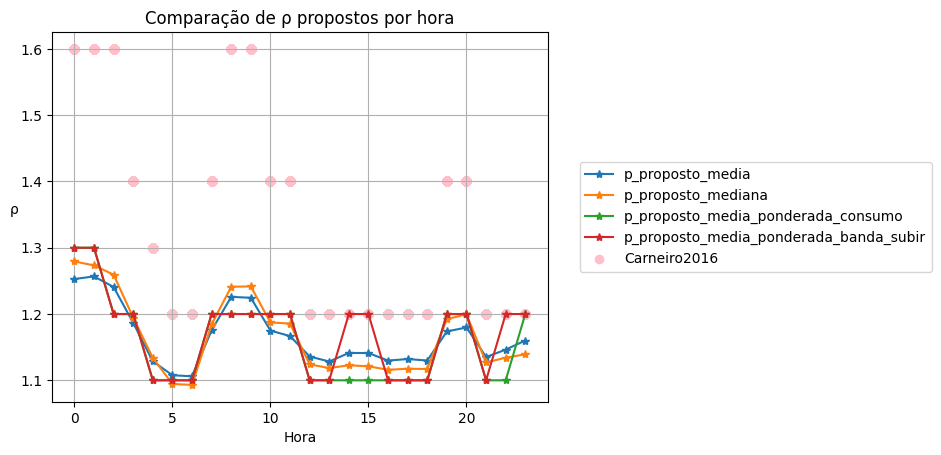

In [26]:
import pandas as pd
import matplotlib.pyplot as plt


# Group data by "HORA" and calculate the required aggregations
aggregated_data = (
    data.groupby("Hora")
    .agg(
        {
            "p_proposto_media": "mean",
            "p_proposto_mediana": "median",
            "p_proposto_media_ponderada_consumo": "mean",
            "p_proposto_media_ponderada_banda_subir": "mean",
        }
    )
    .reset_index()
)

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot lines for different datasets
for column in [
    "p_proposto_media",
    "p_proposto_mediana",
    "p_proposto_media_ponderada_consumo",
     "p_proposto_media_ponderada_banda_subir", ]:
    ax.plot(
        aggregated_data["Hora"],
        aggregated_data[column],
        label=f"{column}",
        marker="*",
    )

# Add scatter plot
ax.scatter(
    data["Hora"], data[tese_celia_rho], color="pink", label="Carneiro2016"
)

# Customize the appearance of the plot
plot_name = "Comparação de ρ propostos por hora"
plt.title(plot_name)
plt.xlabel("Hora")
plt.ylabel("ρ", rotation=0)

plt.grid()
# Add legend
ax.legend(bbox_to_anchor=(1.05, 0.5), loc="center left")
# Show the plot
plt.show()

figure_name_path = os.path.join(
    folder_figures, f"{"_".join(plot_name.lower().split(" "))}.png"
)
fig.savefig(figure_name_path, bbox_inches="tight")

In [27]:
figure_name_path

'/home/joao/Documentos/renewable-penetration/paper/plots/comparação_de_ρ_propostos_por_hora.png'

In [28]:
data.columns

Index(['Data', 'Hora', 'Banda a Subir REN', 'Banda a Descer REN',
       'Banda Contratada Subir [MW]', 'Banda Contratada Descer [MW]',
       'Reserva Secundária - Ativada PT - Subir [MWh]',
       'Reserva Secundária - Ativada PT - Descer [MWh]', 'Consumo [MWh]',
       'Necessidade Banda Reserva', 'Banda Reserva Contractada',
       'Banda Reserva Ativada', 'erro', 'year', 'month', 'day', 'day_of_year',
       'p Carneiro2016', 'p cru', 'Banda Reserva Carneiro2016',
       'Banda a Subir Carneiro2016', 'p_proposto_media', 'p_proposto_mediana',
       'p_proposto_media_ponderada_consumo',
       'p_proposto_media_ponderada_banda_subir'],
      dtype='object')

In [29]:
# p = (Banda_Subir + b) / sqrt(a * Lmax + b²)
# BRS = p x sqrt(a x Lmax + b²) - b
# Lmax = ((((Banda_Subir + b)/p)**2)-(B*B))/A
def calculo_consumo(df, col_banda_subir="", col_rho=""):
    return ((((df[col_banda_subir]+B)/df[col_rho])**2)-(B*B))/A

In [30]:
data['p_Carneiro2016']=data['p Carneiro2016']

In [31]:
erros_cols = []
erros_banda = []
erros_consumo = []
erros_consumo_porbanda = []
error_table = {}

for rho_col in ["p_Carneiro2016",'p_proposto_media', 'p_proposto_mediana',
       'p_proposto_media_ponderada_consumo',
       'p_proposto_media_ponderada_banda_subir']:
    consumo_col_calculado = rho_col.replace("p_", "consumo_")
    bandasubir_col_calculado = rho_col.replace("p_", "banda_subir_")
    consumo_col_calculado2 = rho_col.replace("p_", "consumo_porbanda_")

    data[bandasubir_col_calculado] = calculo_banda_subir(data, col_rho=rho_col, col_L=col_L)

    erro_banda_col = rho_col.replace("p_", "erro_banda_")
    name_banda_reserva_erro_mape = rho_col.replace("p_", "erro_banda_mape_")

    erros_cols.append(erro_banda_col)
    erros_banda.append(erro_banda_col)

    data[erro_banda_col] = data["Banda a Subir REN"]-data[bandasubir_col_calculado]
    
    data[consumo_col_calculado] = calculo_consumo(data, col_rho=rho_col, col_banda_subir="Banda a Subir REN")
    data[consumo_col_calculado2] = calculo_consumo(data, col_rho=rho_col, col_banda_subir=bandasubir_col_calculado)

    erro_consumo_col = rho_col.replace("p_", "erro_consumo_")
    erros_cols.append(erro_consumo_col)
    erros_consumo.append(erro_consumo_col)

    data[erro_consumo_col] = data[col_L]-data[consumo_col_calculado]

    rmse = np.sqrt(np.mean(data[erro_banda_col] ** 2))
    data[name_banda_reserva_erro_mape] = (
        data[erro_banda_col] / data["Banda a Subir REN"]
    ) * 100

    error_table[erro_banda_col] = {
        "MAE": data[erro_banda_col].abs().mean(),
        "RMSE": rmse,
        "MedianAE": data[erro_banda_col].abs().median(),
        "MAPE": data[name_banda_reserva_erro_mape].replace([np.inf, -np.inf], np.nan).dropna().abs().mean(),
    }




In [32]:
data[erros_cols].mean().to_frame()

,0
erro_banda_Carneiro2016,-47.494585
erro_consumo_Carneiro2016,1683.592634
erro_banda_proposto_media,0.044300
erro_consumo_proposto_media,-33.270676
erro_banda_proposto_mediana,-0.090137
erro_consumo_proposto_mediana,-40.137077
erro_banda_proposto_media_ponderada_consumo,2.183867
erro_consumo_proposto_media_ponderada_consumo,-165.209559
erro_banda_proposto_media_ponderada_banda_subir,-1.471556
erro_consumo_proposto_media_ponderada_banda_subir,20.517334


In [33]:
data[erros_banda].mean().to_frame()

,0
erro_banda_Carneiro2016,-47.494585
erro_banda_proposto_media,0.044300
erro_banda_proposto_mediana,-0.090137
erro_banda_proposto_media_ponderada_consumo,2.183867
erro_banda_proposto_media_ponderada_banda_subir,-1.471556


In [34]:
data[erros_consumo].mean().to_frame()

,0
erro_consumo_Carneiro2016,1683.592634
erro_consumo_proposto_media,-33.270676
erro_consumo_proposto_mediana,-40.137077
erro_consumo_proposto_media_ponderada_consumo,-165.209559
erro_consumo_proposto_media_ponderada_banda_subir,20.517334


In [35]:
data[erros_banda].abs().mean().to_frame()

,0
erro_banda_Carneiro2016,49.548714
erro_banda_proposto_media,14.674593
erro_banda_proposto_mediana,14.031727
erro_banda_proposto_media_ponderada_consumo,15.760892
erro_banda_proposto_media_ponderada_banda_subir,16.193020


In [36]:
data[erros_consumo].abs().mean().to_frame()

,0
erro_consumo_Carneiro2016,1787.249244
erro_consumo_proposto_media,711.403588
erro_consumo_proposto_mediana,683.534731
erro_consumo_proposto_media_ponderada_consumo,776.729416
erro_consumo_proposto_media_ponderada_banda_subir,776.596094


In [37]:
error_pd = pd.DataFrame(error_table).T

In [38]:
error_pd.round(2)

,MAE,RMSE,MedianAE,MAPE
erro_banda_Carneiro2016,49.55,60.52,44.65,29.36
erro_banda_proposto_media,14.67,19.87,11.18,8.80
erro_banda_proposto_mediana,14.03,20.36,8.15,8.44
erro_banda_proposto_media_ponderada_consumo,15.76,21.91,10.32,9.30
erro_banda_proposto_media_ponderada_banda_subir,16.19,22.23,11.30,9.73


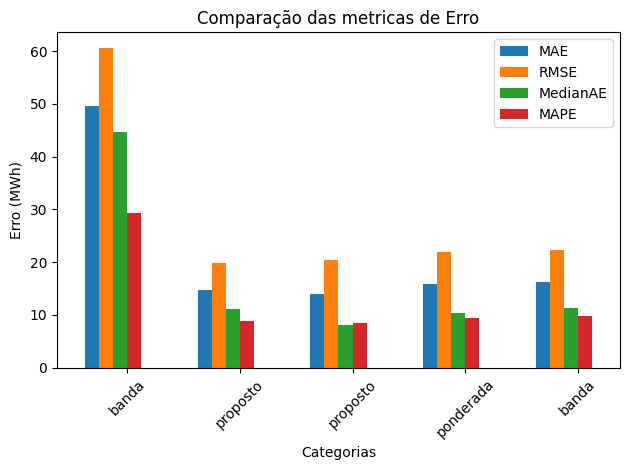

In [39]:
# Transpose the DataFrame
transposed_error_pd = error_pd

# Create a figure and axis object
fig, ax = plt.subplots()

# Set the width of the bars
bar_width = 0.25

# Set the colors for the bars
colors = ["b", "g", "r"]

# Iterate through the metrics and plot each as a separate bar
# for i, (metric, color) in enumerate(zip(transposed_error_pd.columns, colors)):
#   ax.bar(transposed_error_pd.index, transposed_error_pd[metric], bar_width, label=metric, color=color)

transposed_error_pd.plot.bar(ax=ax)

# Annotate the values on top of the bars
# for i, (metric, color) in enumerate(zip(transposed_error_pd.columns, colors)):
#    for j, value in enumerate(transposed_error_pd[metric]):
#        ax.text(j + bar_width / 2, round(value,2), str(round(value,2)), #ha='center', va='bottom',
#                color=color)


# Set the x-tick labels
ax.set_xticks([i + bar_width / 2 for i in range(len(transposed_error_pd))])
ax.set_xticklabels(
    [f.split("_")[-2] for f in transposed_error_pd.index], rotation=45
)

# Customize the appearance of the plot
plot_name = "Comparação das metricas de Erro"
plt.title(plot_name)
plt.xlabel("Categorias")
plt.ylabel("Erro (MWh)")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

figure_name_path = os.path.join(
    folder_figures, f"{"_".join(plot_name.lower().split(" "))}.png"
)
fig.savefig(figure_name_path, bbox_inches="tight")

In [40]:
figure_name_path

'/home/joao/Documentos/renewable-penetration/paper/plots/comparação_das_metricas_de_erro.png'

In [41]:
error_pd = pd.DataFrame(error_table).T
error_pd["Normalização"] = [
    "Carneiro2016",
    "média",
    "mediana",
    "média ponderada consumo",
    "média ponderada banda",
]

In [42]:
error_pd.round(2).set_index("Normalização")

,MAE,RMSE,MedianAE,MAPE
Normalização,,,,
Carneiro2016,49.55,60.52,44.65,29.36
média,14.67,19.87,11.18,8.80
mediana,14.03,20.36,8.15,8.44
média ponderada consumo,15.76,21.91,10.32,9.30
média ponderada banda,16.19,22.23,11.30,9.73


In [45]:
error_pd.round(2).set_index("Normalização").to_latex(
    os.path.join(folder_tables,"tabela_estudo_1_medias.tex"),
    escape=False,  # index=False,
    float_format="%.2f",
)

In [46]:
data.columns

Index(['Data', 'Hora', 'Banda a Subir REN', 'Banda a Descer REN',
       'Banda Contratada Subir [MW]', 'Banda Contratada Descer [MW]',
       'Reserva Secundária - Ativada PT - Subir [MWh]',
       'Reserva Secundária - Ativada PT - Descer [MWh]', 'Consumo [MWh]',
       'Necessidade Banda Reserva', 'Banda Reserva Contractada',
       'Banda Reserva Ativada', 'erro', 'year', 'month', 'day', 'day_of_year',
       'p Carneiro2016', 'p cru', 'Banda Reserva Carneiro2016',
       'Banda a Subir Carneiro2016', 'p_proposto_media', 'p_proposto_mediana',
       'p_proposto_media_ponderada_consumo',
       'p_proposto_media_ponderada_banda_subir', 'p_Carneiro2016',
       'banda_subir_Carneiro2016', 'erro_banda_Carneiro2016',
       'consumo_Carneiro2016', 'consumo_porbanda_Carneiro2016',
       'erro_consumo_Carneiro2016', 'erro_banda_mape_Carneiro2016',
       'banda_subir_proposto_media', 'erro_banda_proposto_media',
       'consumo_proposto_media', 'consumo_porbanda_proposto_media',
       

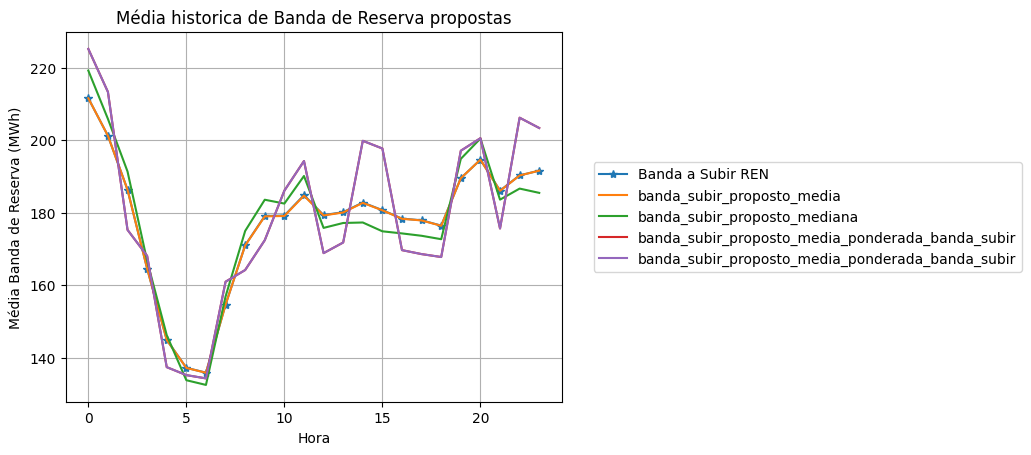

In [262]:
group_col = "Hora"
fig, ax = plt.subplots()
data.groupby(group_col)['Banda a Subir REN'].mean().plot( marker="*",)
ps_to_use = [
    "banda_subir_proposto_media",
    "banda_subir_proposto_mediana",
    "banda_subir_proposto_media_ponderada_banda_subir",
    "banda_subir_proposto_media_ponderada_banda_subir",  # *new_cols
    #"Banda a Subir Carneiro2016",
]

for p_to_use in ps_to_use:
    name_banda_reserva = p_to_use
    data.groupby(group_col)[name_banda_reserva].mean().plot()
plt.legend(bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.grid()
plot_name = "Média historica de Banda de Reserva propostas"
plt.title(plot_name)
plt.ylabel("Média Banda de Reserva (MWh)")

figure_name_path = os.path.join(
    folder_figures, f"{"_".join(plot_name.lower().split(" "))}.png"
)
fig.savefig(figure_name_path, bbox_inches="tight")

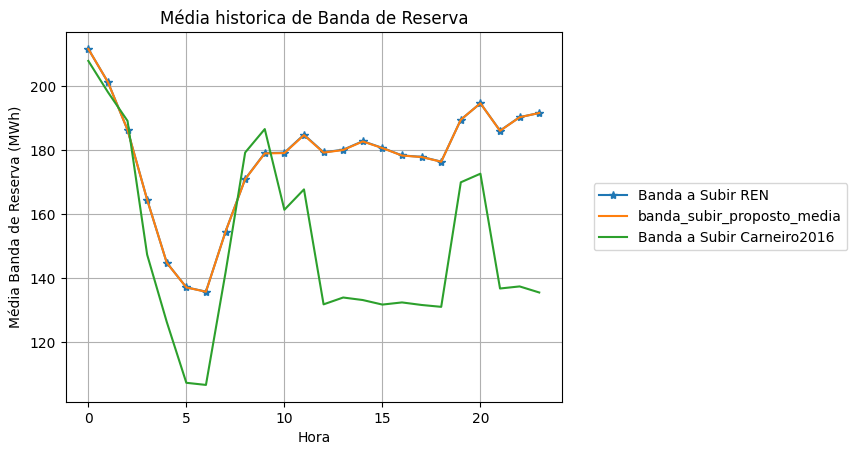

In [263]:
group_col = "Hora"
fig, ax = plt.subplots()
ps_to_use = [
    "banda_subir_proposto_media",
    #"banda_subir_proposto_mediana",
    #"banda_subir_proposto_media_ponderada_banda_subir",
    #"banda_subir_proposto_media_ponderada_banda_subir",  # *new_cols
    "Banda a Subir Carneiro2016",
]
data.groupby(group_col)['Banda a Subir REN'].mean().plot( marker="*",)

for p_to_use in ps_to_use:
    name_banda_reserva = p_to_use
    data.groupby(group_col)[name_banda_reserva].mean().plot()
plt.legend(bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.grid()
plot_name = "Média historica de Banda de Reserva"
plt.title(plot_name)
plt.ylabel("Média Banda de Reserva (MWh)")

figure_name_path = os.path.join(
    folder_figures, f"{"_".join(plot_name.lower().split(" "))}.png"
)
fig.savefig(figure_name_path, bbox_inches="tight")

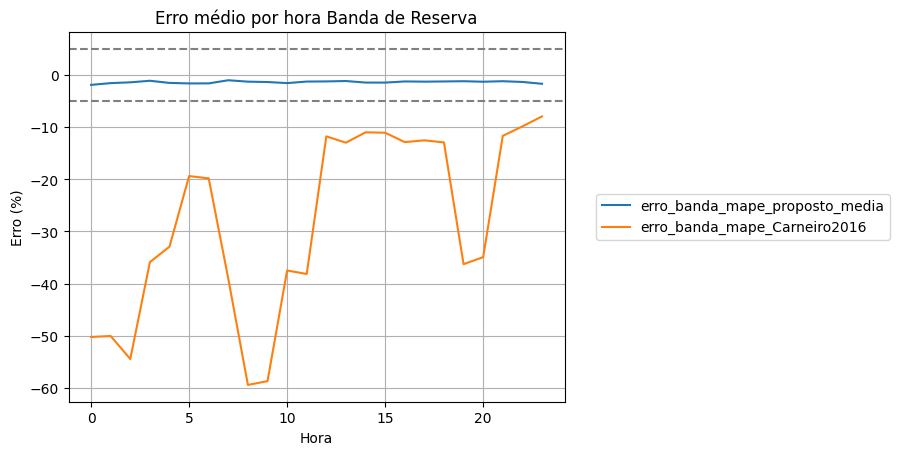

In [264]:
group_col = "Hora"
fig, ax = plt.subplots()

ps_to_use = ["erro_banda_mape_proposto_media", #*new_cols
               "erro_banda_mape_Carneiro2016",]

for p_to_use in ps_to_use:
    name_banda_reserva_erro_mape = p_to_use
    data.replace([np.inf, -np.inf], np.nan).dropna().groupby(group_col)[name_banda_reserva_erro_mape].mean().plot()
plt.legend(bbox_to_anchor=(1.05, 0.5), loc="center left")

ax.axhline(y=-5, color="grey", linestyle="--")
ax.axhline(y=5, color="grey", linestyle="--")
# ax.axhline(y=10, color='grey', linestyle='--')
plot_name = "Erro médio por hora Banda de Reserva"
plt.title(plot_name)
plt.ylabel("Erro (%)")
plt.grid()
figure_name_path = os.path.join(
    folder_figures, f"{"_".join(plot_name.lower().split(" "))}.png"
)
fig.savefig(figure_name_path, bbox_inches="tight")
# fig.savefig(f"{plot_name}.png",bbox_inches='tight')

In [265]:
table_p_proposto = pd.DataFrame(
    [data.groupby("Hora")["p_proposto_media"].mean().to_dict()]
).T
table_p_proposto["Hora"] = table_p_proposto.index.astype(str)
table_p_proposto["""\\rho"""] = table_p_proposto[0]
table_p_proposto = table_p_proposto[["Hora", "\\rho"]]

In [269]:
table_p_proposto.round(2).T

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Hora,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
\rho,1.25,1.26,1.24,1.19,1.13,1.11,1.11,1.18,1.23,1.22,...,1.14,1.14,1.13,1.13,1.13,1.17,1.18,1.14,1.15,1.16


In [203]:
table_name_path = os.path.join(folder_tables, "table_p_proposto.tex")


table_p_proposto.to_latex(
    table_name_path,
    escape=False,
    index=False,
    #header=False,
    # float_format="%.2f"
)

In [204]:
col_p_name = "p_proposto_media"

new_cols = []
for i in range(1, 6):
    print(i)
    col_new_p_round = f"{col_p_name}_round_{i}"
    data[col_new_p_round] = data[col_p_name].round(i)
    new_cols.append(col_new_p_round)

1
2
3
4
5


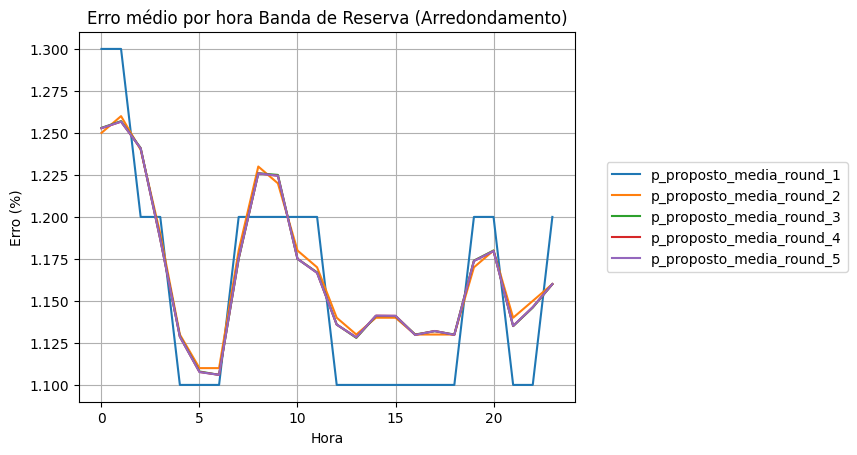

In [208]:
group_col = "Hora"
fig, ax = plt.subplots()

ps_to_use = new_cols

for p_to_use in ps_to_use:
    name_banda_reserva_erro_mape = p_to_use
    data.groupby(group_col)[name_banda_reserva_erro_mape].mean().plot()
plt.legend(bbox_to_anchor=(1.05, 0.5), loc="center left")

#ax.axhline(y=-5, color="grey", linestyle="--")
#ax.axhline(y=5, color="grey", linestyle="--")
# ax.axhline(y=10, color='grey', linestyle='--')
plot_name = "Erro médio por hora Banda de Reserva (Arredondamento)"
plt.title(plot_name)
plt.ylabel("Erro (%)")
plt.grid()
figure_name_path = os.path.join(
    folder_figures, f"{"_".join(plot_name.lower().split(" "))}.png"
)
fig.savefig(figure_name_path, bbox_inches="tight")
# fig.savefig(f"{plot_name}.png",bbox_inches='tight')